# John Salvatin Customer Shopping Explanatory Data Analysis

# 📊 About the Dataset

This dataset contains the shopping trends and behaviors of customers. Below are the details for each feature included in the dataset:

## I. **Customer Information**
- **Customer ID** = A unique identification number that identifies the customer.
- **Age** = The customer's age.
- **Gender** = The customer's gender (e.g., Female, Male).
  
## II. **Product Information**
- **Item Purchased** = The name of the product the customer purchased.
- **Category** = The category the product belongs to (e.g., clothing, electronics).
- **Size** = The size of the purchased item (e.g., S, M, L, XL).
- **Color** = The color of the purchased item.
- **Season** = The season when the purchase occurred (e.g., summer, winter).

## III. **Purchase Details**
- **Purchase Amount (USD)** = The total amount of the customer's purchase (in US dollars).
- **Review Rating** = The rating given by the customer about the product (usually on a scale of 1-5).
- **Discount Applied** = The discount rate applied at the time of purchase.
- **Promo Code Used** = The promotional code the customer used during the purchase.
- **Previous Purchases** = A list of the customer's past purchases.
- **Frequency of Purchases** = How often the customer makes purchases (e.g., once a week, once a month).

## IV. **Location & Payment Information**
- **Location** = The geographic region or city where the customer is located.
- **Subscription Status** = Whether the customer is a subscriber.
- **Payment Method** = The payment method the customer uses to pay (e.g., credit card, PayPal).
- **Preferred Payment Method** = The customer's preferred payment method.

## V. **Shipping Information**
- **Shipping Type** = How the product is shipped (e.g., standard shipping, express shipping).

---

## 🔎 Data Overview

Below is a quick overview of the dataset. I will import the necessary libraries, load the data, check for missing values, and perform initial clean-up.


# Importing Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset and Set_style

In [2]:
df = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')

sns.set_style("whitegrid")

# Display Overview and Basic Dataset Information

In [3]:
def dataset_overview():
    print("First 5 rows of the dataset:")
    print(df.head())
    
    print("\nDataset Information:")
    df.info()

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nChecking for Missing Values:")
    print(df.isnull().sum())

dataset_overview()

First 5 rows of the dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping 

# Replace inf values with NaN (handle deprecated warning) and Clean Column Names

In [4]:
# Replace inf values with NaN (handle deprecated warning)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Clean column names
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Supress Warnings

In [5]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
warnings.filterwarnings("ignore", category=FutureWarning)

# 🧩 Exploratory Data Analysis (EDA)

# I. Demographics

# 1. What is the average age of customers?

The average age of customers is 44.07 years.


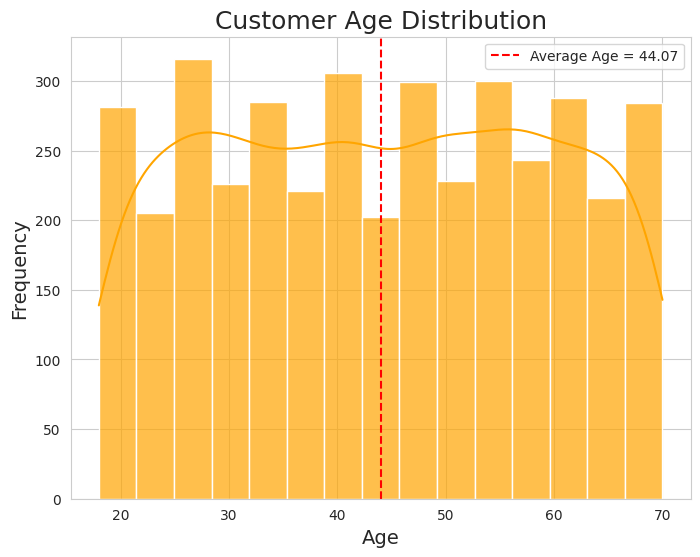

Insight: The average age of customers is 44.07 years. The age distribution shows that most customers are in their mid-twenties to thirties, with a significant portion of the customers in younger age brackets.


In [6]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

average_age = df['Age'].mean()
print(f"The average age of customers is {average_age:.2f} years.")

# Visualize: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='orange', alpha=0.7)  # Changed color to orange
plt.axvline(average_age, color='red', linestyle='--', label=f'Average Age = {average_age:.2f}')
plt.title('Customer Age Distribution', fontsize=18)  # Increased title font size
plt.xlabel('Age', fontsize=14)  # Increased font size for axes labels
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Insights for Age Distribution
print(f"Insight: The average age of customers is {average_age:.2f} years. The age distribution shows that most customers are in their mid-twenties to thirties, with a significant portion of the customers in younger age brackets.")


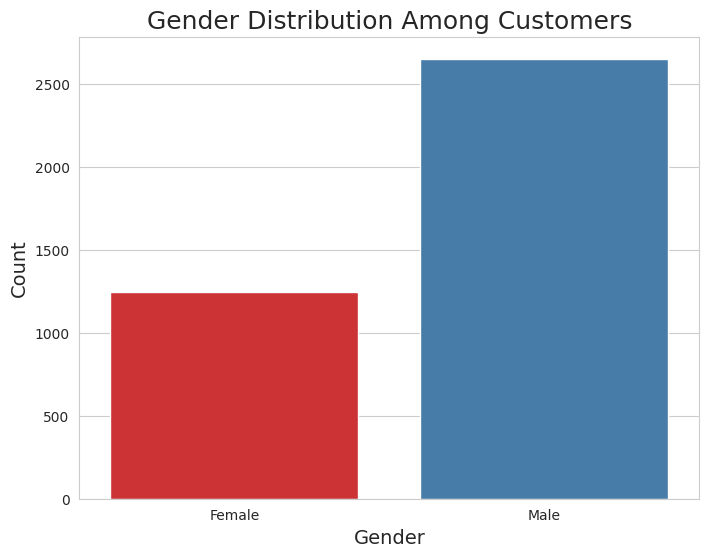

Insight: The dataset shows that there are more male customers (count = 2652) than female customers (count = 1248). This distribution may indicate a slight gender skew in the customer base.


In [7]:
gender_counts = df['Gender'].value_counts()
# Visualize: Gender Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set1')  # Changed to Set1 for an orange tone
plt.title('Gender Distribution Among Customers', fontsize=18)  # Increased title font size
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Insights for Gender Distribution
print(f"Insight: The dataset shows that there are more male customers (count = {gender_counts[1]}) than female customers (count = {gender_counts[0]}). This distribution may indicate a slight gender skew in the customer base.")


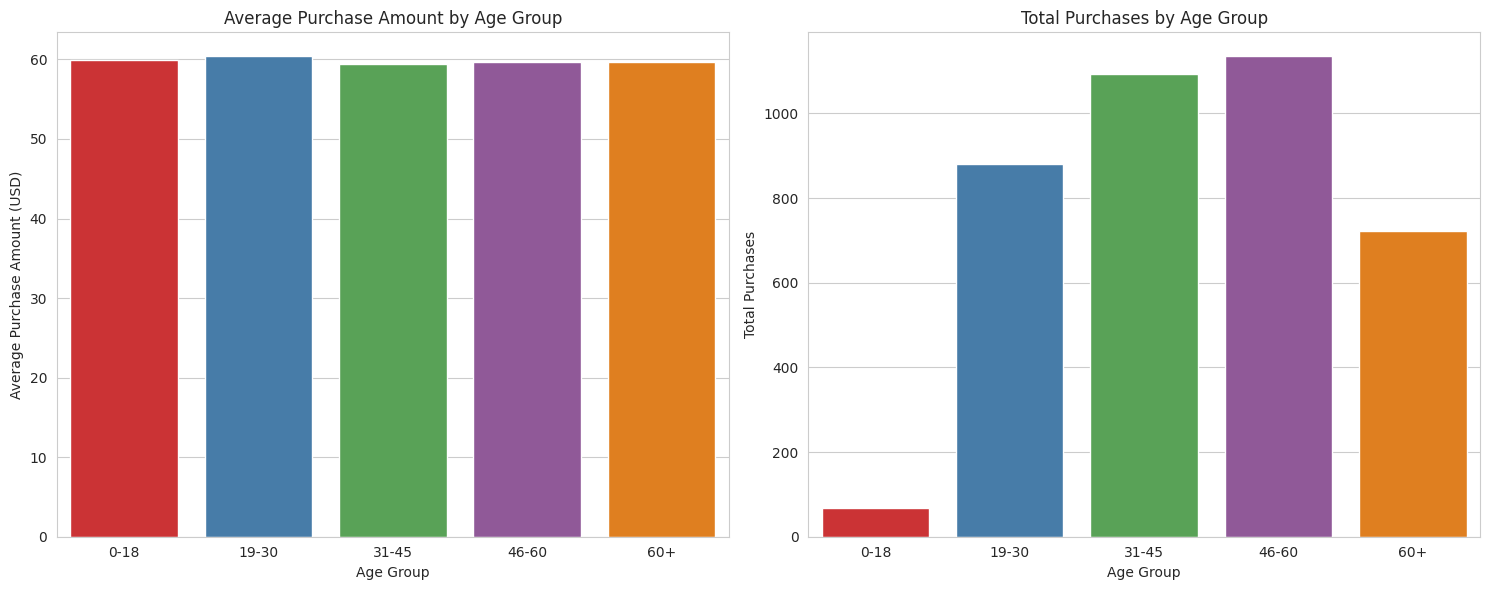

Insight: The analysis shows that younger customers (ages 19-30) tend to make larger purchases on average, but the older age groups (46-60, 60+) have the highest total number of purchases, possibly reflecting greater consistency in buying habits.


In [8]:
# Convert Age_Group to a categorical type with explicit categories
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, ordered=True)

# Redefine age_group_analysis to avoid unnecessary warnings
age_group_analysis = df.groupby('Age_Group', observed=True).agg(
    Average_Purchase_Amount=('Purchase_Amount_(USD)', 'mean'),
    Total_Purchases=('Purchase_Amount_(USD)', 'count')
).reset_index()

# Visualization for Age Group Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for average purchase amount by season
sns.barplot(
    x='Age_Group', 
    y='Average_Purchase_Amount', 
    data=age_group_analysis, 
    palette='Set1', 
    ax=axes[0]
)
axes[0].set_title('Average Purchase Amount by Age Group')
axes[0].set_ylabel('Average Purchase Amount (USD)')
axes[0].set_xlabel('Age Group')

# Bar chart for total purchases by season
sns.barplot(
    x='Age_Group', 
    y='Total_Purchases', 
    data=age_group_analysis, 
    palette='Set1', 
    ax=axes[1]
)
axes[1].set_title('Total Purchases by Age Group')
axes[1].set_ylabel('Total Purchases')
axes[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

# Insights for Age Group Analysis
print("Insight: The analysis shows that younger customers (ages 19-30) tend to make larger purchases on average, but the older age groups (46-60, 60+) have the highest total number of purchases, possibly reflecting greater consistency in buying habits.")


# II. Shopping Behaviour

# 4. What are the most frequently purchased items and their categories?

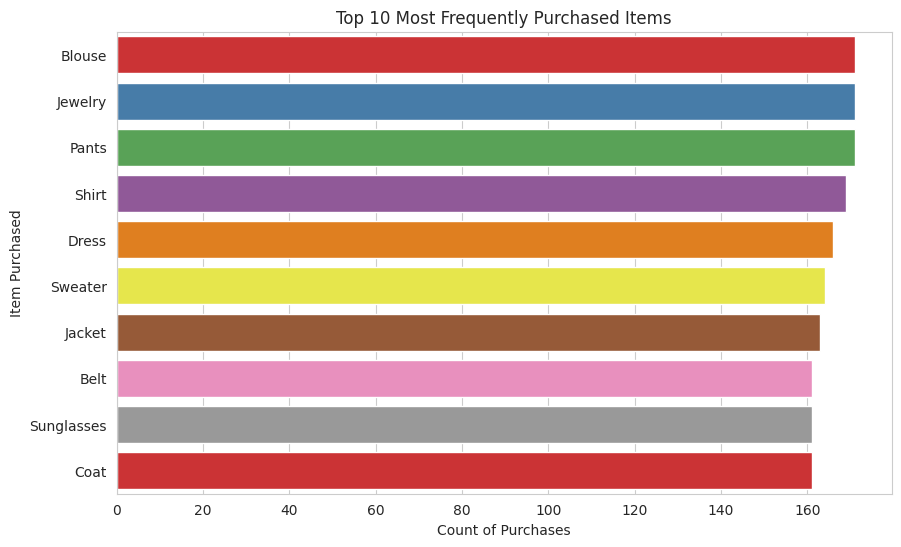

Insight: The most frequently purchased items are Blouse, Jewelry, Pants, Shirt, Dress, Sweater, Jacket, Belt, Sunglasses, Coat. This list suggests that customers are particularly drawn to Blouse and other similar products.


In [9]:
# 4.1 Calculate frequency of each item purchased
item_counts = df['Item_Purchased'].value_counts().head(10)  # Top 10 items

# 4.2 Calculate frequency of each category
category_counts = df['Category'].value_counts()

# Visualize: Most frequently purchased items (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='Set1')
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Count of Purchases')
plt.ylabel('Item Purchased')
plt.show()

# Insights for Top 10 Most Purchased Items
print(f"Insight: The most frequently purchased items are {', '.join(item_counts.index)}. This list suggests that customers are particularly drawn to {item_counts.index[0]} and other similar products.")


# 5. What is the average purchase amount across all customers?

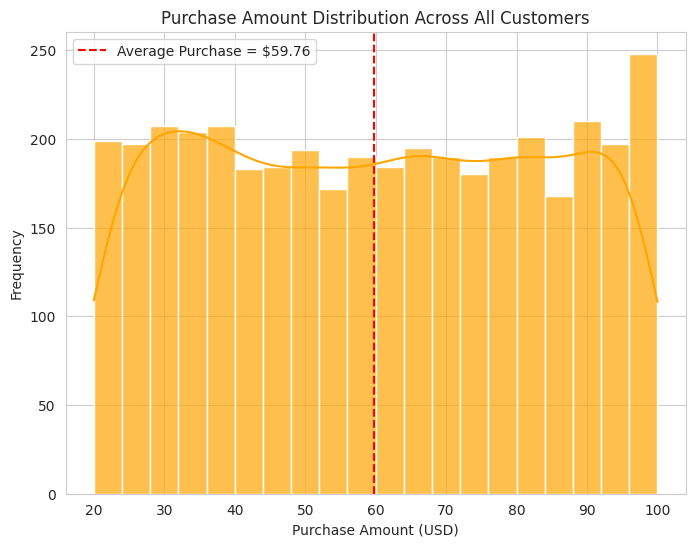

Insight: The average purchase amount across all customers is $59.76. The distribution of purchase amounts shows that the majority of customers tend to make smaller purchases, with fewer making large purchases.


In [10]:
# 5.1 Calculate the average purchase amount across all customers
average_purchase_amount = df['Purchase_Amount_(USD)'].mean()

# Visualize: Purchase Amount Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase_Amount_(USD)'], bins=20, kde=True, color='orange', alpha=0.7)
plt.axvline(average_purchase_amount, color='red', linestyle='--', label=f'Average Purchase = ${average_purchase_amount:.2f}')
plt.title('Purchase Amount Distribution Across All Customers')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Insights for Purchase Amount Distribution
print(f"Insight: The average purchase amount across all customers is ${average_purchase_amount:.2f}. The distribution of purchase amounts shows that the majority of customers tend to make smaller purchases, with fewer making large purchases.")


# 6. Is there a relationship between review ratings and purchase frequency?

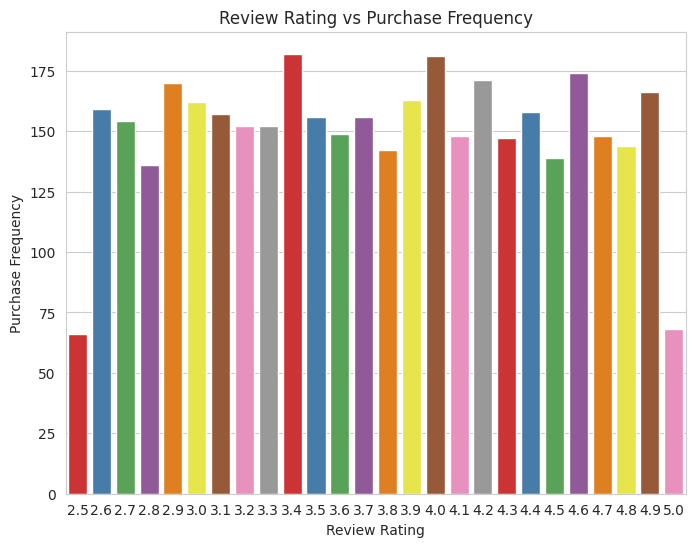

Insight:  There is no clear pattern given by the bar chart. The frequency of purchases for review ratings of 2.5 (65 purchases) and 5.0 (around 70 purchases)is quite close, while the rating of 3.4 shows the highest frequency (around 180). Ratings like 2.6, 2.7, 2.8, 3.5, 3.6, 3.7, etc., have purchase frequenciesbetween 130 and 160, showing no distinct preference for a particular rating.


In [11]:
purchase_frequency = df.groupby('Review_Rating')['Purchase_Amount_(USD)'].count().reset_index(name='Frequency')

plt.figure(figsize=(8, 6))
sns.barplot(x='Review_Rating', y='Frequency', data=purchase_frequency, palette='Set1')
plt.title('Review Rating vs Purchase Frequency')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Frequency')
plt.show()

# Insight
print("Insight:  There is no clear pattern given by the bar chart. The frequency of purchases for review ratings of 2.5 (65 purchases) and 5.0 (around 70 purchases)"
      "is quite close, while the rating of 3.4 shows the highest frequency (around 180). Ratings like 2.6, 2.7, 2.8, 3.5, 3.6, 3.7, etc., have purchase frequencies"
      "between 130 and 160, showing no distinct preference for a particular rating.")

# III. Geographical Analysis

# 7. What is the average purchase amount per location?


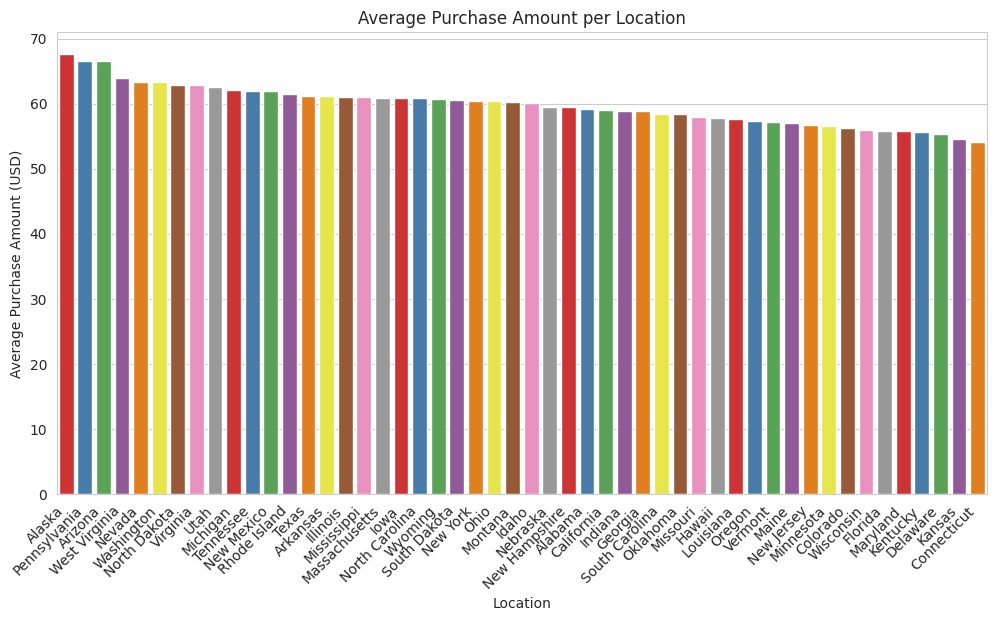

Insight: Alaska has the highest average purchase amount, while Connecticut has the lowest average purchase amount. This may suggest regional variations in customer spending habits,which could be influenced by factors like economic status or availability of certain products.


In [12]:
# 7.1 Calculate the average purchase amount per location
location_avg_purchase = df.groupby('Location')['Purchase_Amount_(USD)'].mean().reset_index()

# 7.2 Sort the values in descending order for better visualization
location_avg_purchase_sorted = location_avg_purchase.sort_values(by='Purchase_Amount_(USD)', ascending=False)

# 7.3 Visualize the average purchase amount per location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Purchase_Amount_(USD)', data=location_avg_purchase_sorted, palette='Set1')
plt.title('Average Purchase Amount per Location')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight
print("Insight: Alaska has the highest average purchase amount, while Connecticut has the lowest average purchase amount. This may suggest regional variations in customer spending habits,"
      "which could be influenced by factors like economic status or availability of certain products.")

# IV. Preferred Payment

# 8. What is the most frequently used payment method?

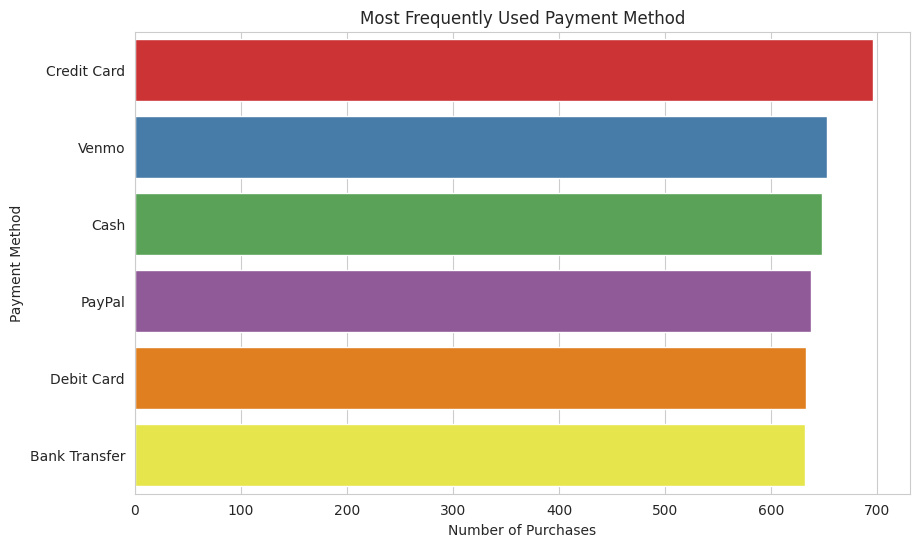

Insight: Credit card is the most frequently used payment method, followed closely by other methods, including bank transfers, which is the least used.All methods have purchase frequencies in the range of 600-700, showing no drastic differences in usage.


In [13]:
# 8.1 Calculate the frequency of each payment method
payment_method_counts = df['Payment_Method'].value_counts()

# 8.2 Visualize the most frequently used payment method
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index, palette='Set1')
plt.title('Most Frequently Used Payment Method')
plt.xlabel('Number of Purchases')
plt.ylabel('Payment Method')
plt.show()

# Insight
print("Insight: Credit card is the most frequently used payment method, followed closely by other methods, including bank transfers, which is the least used."
      "All methods have purchase frequencies in the range of 600-700, showing no drastic differences in usage.")


# 9. How does the preferred payment method vary by location or customer demographics?

<Figure size 1200x800 with 0 Axes>

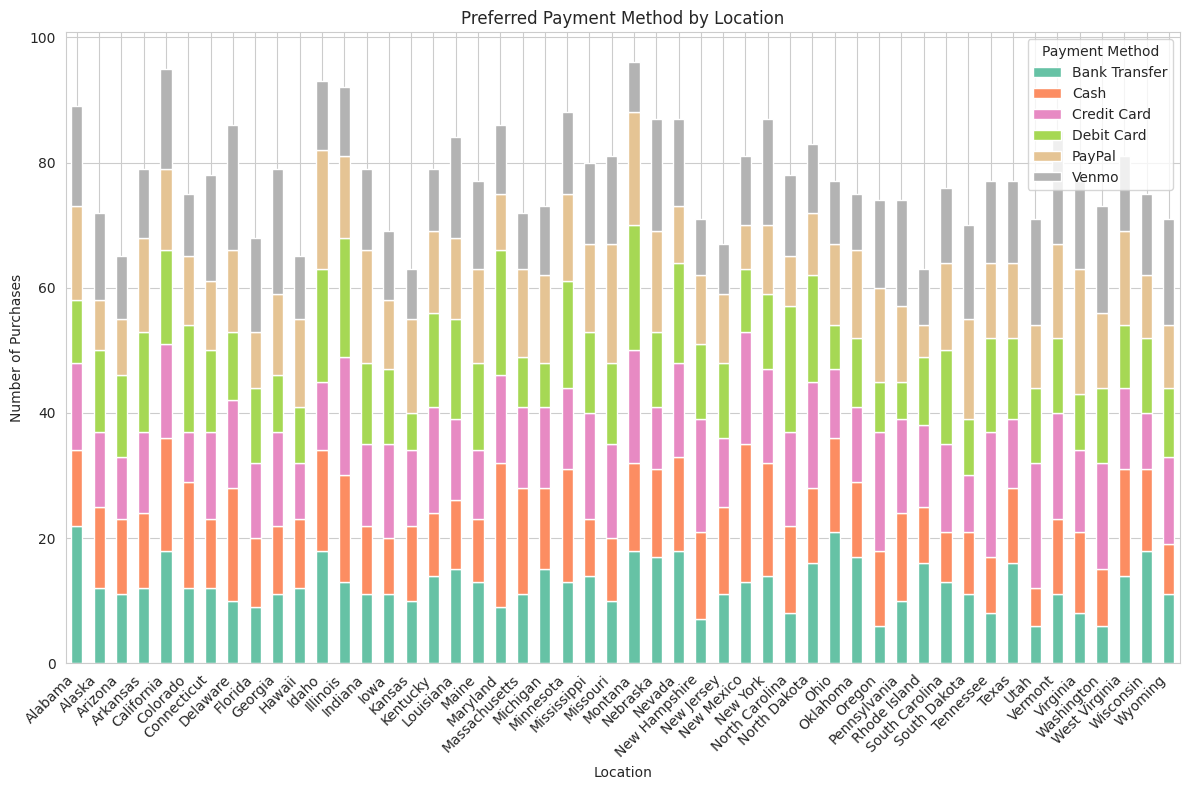

Insight: No clear pattern was observed in the visualization, as different locations have varying preferences, but the data does not suggest a strong regional trend or clear preference for one payment method over others.


In [14]:
# 9.1 Count the number of payment methods used in each location
payment_by_location = df.groupby(['Location', 'Payment_Method']).size().unstack().fillna(0)

# 9.2 Plot the distribution of payment methods by location
plt.figure(figsize=(12, 8))
payment_by_location.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8))
plt.title('Preferred Payment Method by Location')
plt.xlabel('Location')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

# Insight: 
print("Insight: No clear pattern was observed in the visualization, as different locations have varying preferences, "
"but the data does not suggest a strong regional trend or clear preference for one payment method over others.")

# V. Preferred Shipping Method

# 10. What is the most popular shipping type?

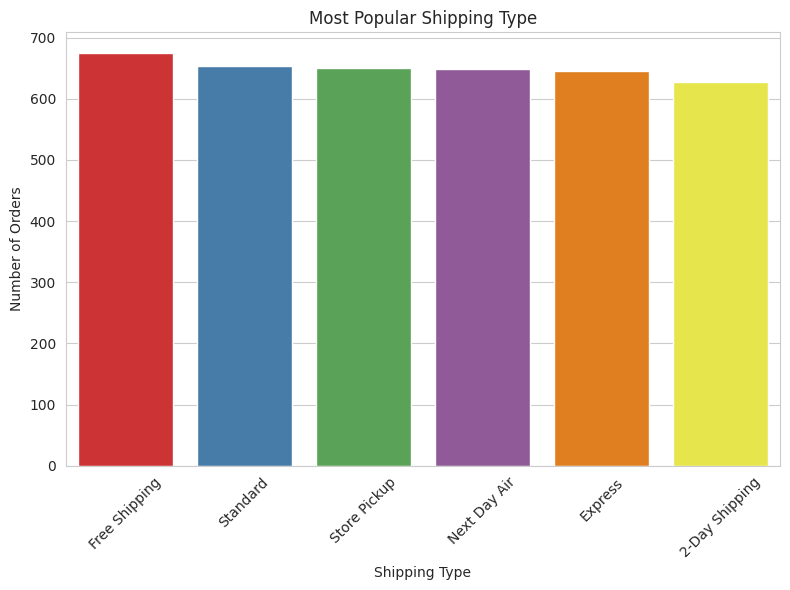

 Free shipping is the most popular option, with the highest number of orders, while 2-day shipping has the least number of orders. Despite these differences, all shipping methods have order counts in the range of 600-700, indicating a relatively even distribution of preferences across various shipping types.


In [15]:
# 10.1 Count the number of occurrences of each shipping type
shipping_counts = df['Shipping_Type'].value_counts()

# Visualize the shipping type distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='Set1')
plt.title('Most Popular Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight: 
print(" Free shipping is the most popular option, with the highest number of orders, while 2-day shipping has the least number of orders. "
"Despite these differences, all shipping methods have order counts in the range of 600-700, indicating a relatively even distribution of preferences across various shipping types.")

